In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("wine.csv")

In [3]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.shape

(178, 14)

In [5]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [6]:
df.duplicated().sum()

0

EDA

<Axes: >

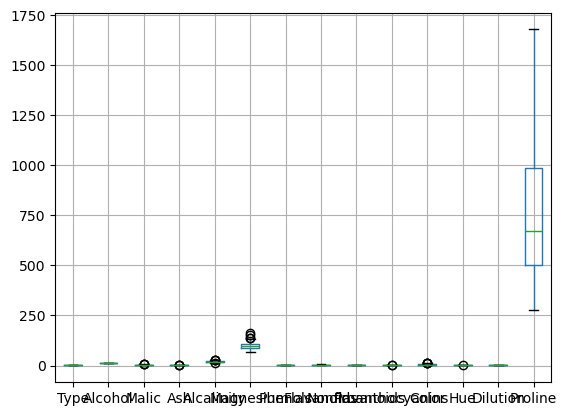

In [8]:
df.boxplot()

In [9]:
def outlier_capping(df,column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    lower_extreme=q1-(1.5*iqr)
    upper_extreme=q3+(1.5*iqr)
    df[column]=df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(["int","float"]).columns:
    outlier_capping(df,col)

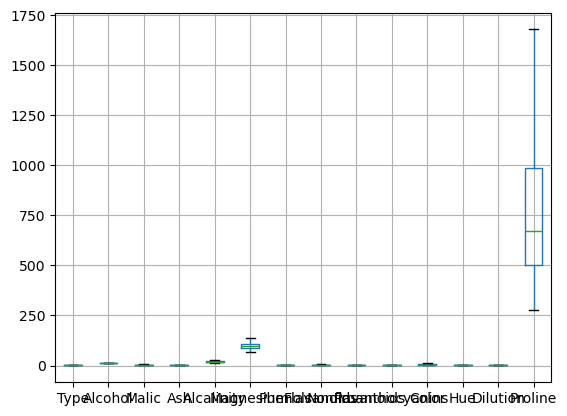

In [10]:
df.boxplot()
plt.show()

In [11]:
df.hist()

array([[<Axes: title={'center': 'Type'}>,
        <Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'Malic'}>,
        <Axes: title={'center': 'Ash'}>],
       [<Axes: title={'center': 'Alcalinity'}>,
        <Axes: title={'center': 'Magnesium'}>,
        <Axes: title={'center': 'Phenols'}>,
        <Axes: title={'center': 'Flavanoids'}>],
       [<Axes: title={'center': 'Nonflavanoids'}>,
        <Axes: title={'center': 'Proanthocyanins'}>,
        <Axes: title={'center': 'Color'}>,
        <Axes: title={'center': 'Hue'}>],
       [<Axes: title={'center': 'Dilution'}>,
        <Axes: title={'center': 'Proline'}>, <Axes: >, <Axes: >]],
      dtype=object)

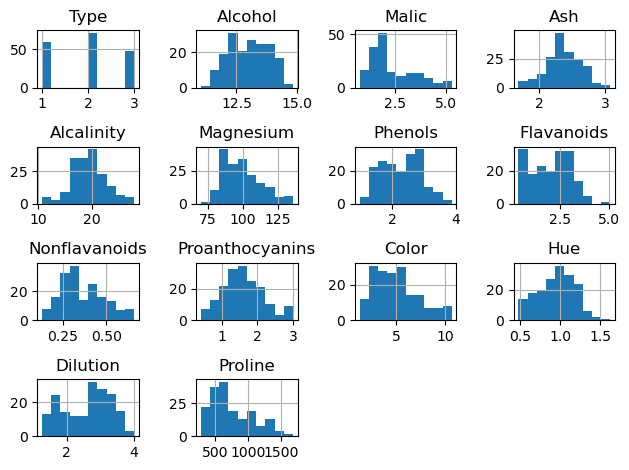

In [12]:

plt.tight_layout()
plt.show()

In [13]:
sns.kdeplot(df)

<Axes: ylabel='Density'>

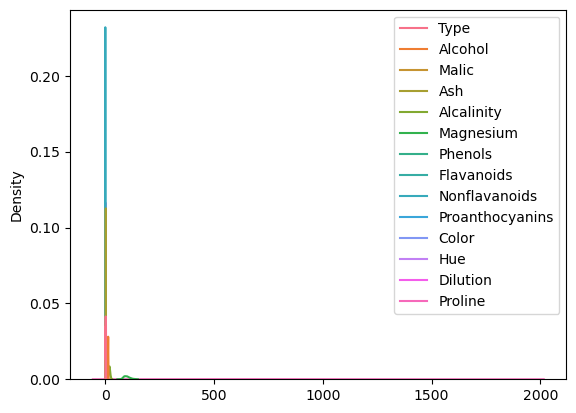

In [14]:
plt.show()

In [15]:
corr=df.corr()
corr

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.440422,-0.047680,0.525608,-0.224264,-0.719163,-0.847498,0.489109,-0.512528,0.260260,-0.621549,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094756,0.220174,-0.312191,0.302173,0.289101,0.236815,-0.155929,0.153171,0.549107,-0.067156,0.072343,0.643720
Malic,0.440422,0.094756,1.000000,0.166614,0.295882,-0.039329,-0.339050,-0.414875,0.294203,-0.234575,0.264897,-0.566409,-0.372582,-0.191173
Ash,-0.047680,0.220174,0.166614,1.000000,0.427713,0.322510,0.124436,0.097562,0.183666,0.006080,0.256799,-0.075904,-0.011214,0.229676
Alcalinity,0.525608,-0.312191,0.295882,0.427713,1.000000,-0.098030,-0.333046,-0.363405,0.369276,-0.208794,0.009748,-0.286664,-0.287032,-0.448700
Magnesium,-0.224264,0.302173,-0.039329,0.322510,-0.098030,1.000000,0.227035,0.209431,-0.255674,0.201428,0.240505,0.040007,0.064019,0.411557
Phenols,-0.719163,0.289101,-0.339050,0.124436,-0.333046,0.227035,1.000000,0.864564,-0.449935,0.618771,-0.062101,0.435952,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.414875,0.097562,-0.363405,0.209431,0.864564,1.000000,-0.537900,0.665384,-0.169807,0.546718,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.294203,0.183666,0.369276,-0.255674,-0.449935,-0.537900,1.000000,-0.368455,0.131596,-0.266995,-0.503270,-0.311385
Proanthocyanins,-0.512528,0.153171,-0.234575,0.006080,-0.208794,0.201428,0.618771,0.665384,-0.368455,1.000000,-0.032693,0.306289,0.530565,0.340562


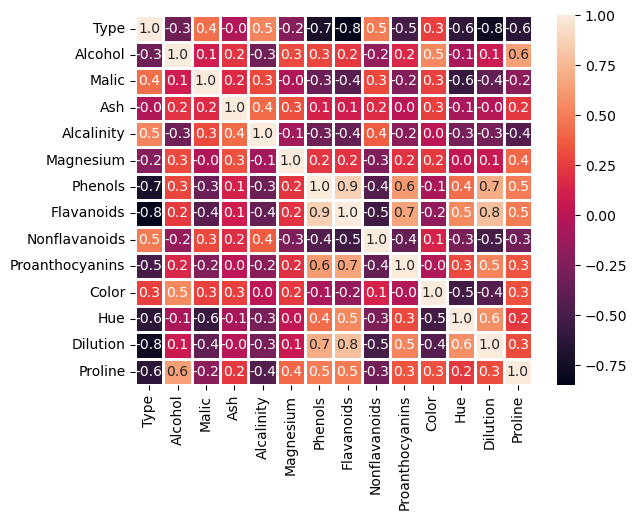

In [16]:
sns.heatmap(corr,annot=True,fmt='.1f',linewidths=1)
plt.show()

In [17]:
target=df[["Type"]]
features=df.drop(columns=["Type"])

In [18]:
target

,Type
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


In [19]:
features

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.7100,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.7800,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.3600,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.9500,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.5900,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.3025,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.9100,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.2800,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.5900,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(features)

In [22]:
scaled_data

array([[ 1.51861254, -0.56553422,  0.24064008, ...,  0.36660959,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.50172839, -0.86217567, ...,  0.41076822,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02694849,  1.15331518, ...,  0.32245097,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.77705125, -0.40583812, ..., -1.6205284 ,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.23659622,  0.0124713 , ..., -1.57636978,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.61297912,  1.41951209, ..., -1.53221115,
        -1.42894777, -0.59516041]])

In [23]:
featured_data=pd.DataFrame(scaled_data,columns=features.columns)

In [24]:
featured_data

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.518613,-0.565534,0.240640,-1.182882,2.057111,0.808997,1.034819,-0.659563,1.264740,0.266954,0.366610,1.847920,1.013009
1,0.246290,-0.501728,-0.862176,-2.524956,0.038639,0.568648,0.733629,-0.820719,-0.549904,-0.291923,0.410768,1.113449,0.965242
2,0.196879,0.026948,1.153315,-0.267832,0.113397,0.808997,1.215533,-0.498407,2.199012,0.284696,0.322451,0.788587,1.395148
3,1.691550,-0.346771,0.506837,-0.816862,1.010496,2.491446,1.466525,-0.981875,1.067105,1.225029,-0.428246,1.184071,2.334574
4,0.295700,0.236596,1.913878,0.464208,1.384287,0.808997,0.663351,0.226796,0.420301,-0.318536,0.366610,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.709072,0.316696,0.311700,-0.335152,-0.985614,-1.424900,1.274310,-0.945173,1.180674,-1.399735,-1.231206,-0.021952
174,0.493343,1.439792,0.430781,1.074241,0.188156,-0.793334,-1.284344,0.549108,-0.316336,1.003253,-1.134784,-1.485445,0.009893
175,0.332758,1.777051,-0.405838,0.159191,1.533804,-1.129824,-1.344582,0.549108,-0.424137,2.289557,-1.620528,-1.485445,0.280575
176,0.209232,0.236596,0.012471,0.159191,1.533804,-1.033684,-1.354622,1.354888,-0.226502,1.890359,-1.576370,-1.400699,0.296498


In [25]:
from sklearn.decomposition import PCA

In [26]:
pca=PCA()
data=pca.fit_transform(scaled_data)

In [27]:
data

array([[ 3.35814747,  1.52022185, -0.12637492, ..., -0.35905487,
         0.59934286, -0.1082988 ],
       [ 2.22921481, -0.33326137, -2.04283756, ..., -0.12060222,
         0.3722891 ,  0.00364028],
       [ 2.54005743,  1.03695315,  1.01884481, ..., -0.28999114,
         0.04671301,  0.04203325],
       ...,
       [-2.67116907,  2.86530059, -0.97512583, ...,  0.59573367,
         0.64695727, -0.02552532],
       [-2.37160346,  2.39380794, -0.56148477, ...,  0.35395561,
         0.34668062, -0.08347129],
       [-3.22745394,  2.80053456,  1.03090733, ..., -0.28617201,
        -0.13792419, -0.32602699]])

In [28]:
fea=pd.DataFrame(data,columns=features.columns)

In [29]:
fea

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,3.358147,1.520222,-0.126375,-0.224356,0.710891,0.176645,0.701154,0.019187,-0.689257,-1.031209,-0.359055,0.599343,-0.108299
1,2.229215,-0.333261,-2.042838,-0.365783,-0.107448,0.984902,0.048001,0.991649,0.379664,-0.208787,-0.120602,0.372289,0.003640
2,2.540057,1.036953,1.018845,0.766907,-0.363113,-0.537666,0.412691,-0.464401,1.164755,-0.136538,-0.289991,0.046713,0.042033
3,3.781124,2.782566,-0.149224,0.593304,-0.273054,-0.132210,-0.394978,0.694895,-0.001904,-0.241293,0.688896,-0.318833,-0.380455
4,1.016872,0.955225,2.113169,-0.431732,0.357108,0.386733,0.487160,0.377559,-0.283486,0.036566,-0.577236,-0.165368,-0.050547
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.311751,2.173369,-0.383365,0.925038,-0.633273,1.060998,0.685717,-0.130305,0.027147,0.235376,0.111934,0.102554,-0.135217
174,-2.612425,1.797712,0.210332,0.398412,0.192034,-0.011534,0.136131,-0.565178,0.063488,0.222939,0.236649,-0.309409,-0.181156
175,-2.671169,2.865301,-0.975126,0.360633,1.185098,-0.354148,0.853504,0.013484,-0.020689,0.267263,0.595734,0.646957,-0.025525
176,-2.371603,2.393808,-0.561485,-0.643948,0.658651,-1.252325,0.813131,0.351025,-0.086492,-0.495366,0.353956,0.346681,-0.083471


In [30]:
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.36475803, 0.19609775, 0.10911182, 0.07062378, 0.06296983,
       0.04815067, 0.04031504, 0.02744533, 0.02232516, 0.01931106,
       0.01755433, 0.01326634, 0.00807088])

In [31]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
cumulative_explained_variance

array([0.36475803, 0.56085577, 0.66996759, 0.74059137, 0.8035612 ,
       0.85171187, 0.89202691, 0.91947224, 0.9417974 , 0.96110846,
       0.97866279, 0.99192912, 1.        ])

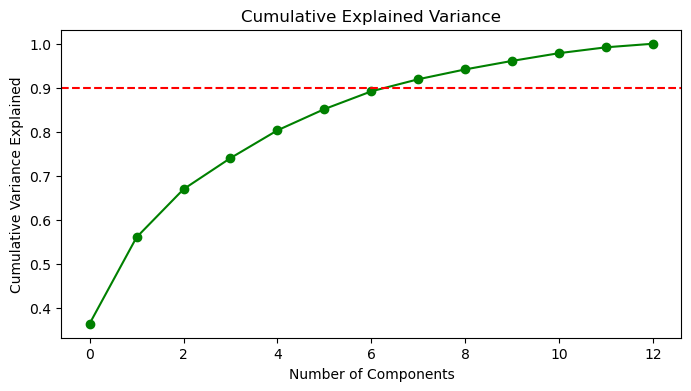

In [32]:
plt.figure(figsize=(8,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', color='green')
plt.axhline(y=0.90, color='r', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.show()

In [33]:
n_components_90 = np.argmax(cumulative_explained_variance >= 0.90)+1
n_components_90

8

In [34]:
pca=PCA(n_components=8)

In [35]:
pca_data=pca.fit_transform(scaled_data)

In [36]:
pca_data

array([[ 3.35814747,  1.52022185, -0.12637492, ...,  0.17664455,
         0.70115415,  0.01918672],
       [ 2.22921481, -0.33326137, -2.04283756, ...,  0.98490211,
         0.04800137,  0.9916492 ],
       [ 2.54005743,  1.03695315,  1.01884481, ..., -0.53766636,
         0.41269113, -0.46440095],
       ...,
       [-2.67116907,  2.86530059, -0.97512583, ..., -0.3541478 ,
         0.85350446,  0.01348408],
       [-2.37160346,  2.39380794, -0.56148477, ..., -1.25232522,
         0.81313133,  0.35102538],
       [-3.22745394,  2.80053456,  1.03090733, ..., -0.23182472,
        -0.13011951, -0.2033248 ]])

In [37]:
pca_df=pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])

In [38]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,3.358147,1.520222,-0.126375,-0.224356,0.710891,0.176645,0.701154,0.019187
1,2.229215,-0.333261,-2.042838,-0.365783,-0.107448,0.984902,0.048001,0.991649
2,2.540057,1.036953,1.018845,0.766907,-0.363113,-0.537666,0.412691,-0.464401
3,3.781124,2.782566,-0.149224,0.593304,-0.273054,-0.132210,-0.394978,0.694895
4,1.016872,0.955225,2.113169,-0.431732,0.357108,0.386733,0.487160,0.377559


In [39]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [40]:
kmean_org=KMeans(n_clusters=8,random_state=50)

In [44]:
clusters_orig = kmean_org.fit(scaled_data)

In [46]:
cluster_label=kmean_org.labels_

In [58]:
silhouette_score_org=silhouette_score(scaled_data,cluster_label)

In [64]:
silhouette_score_org

0.1426546116123827

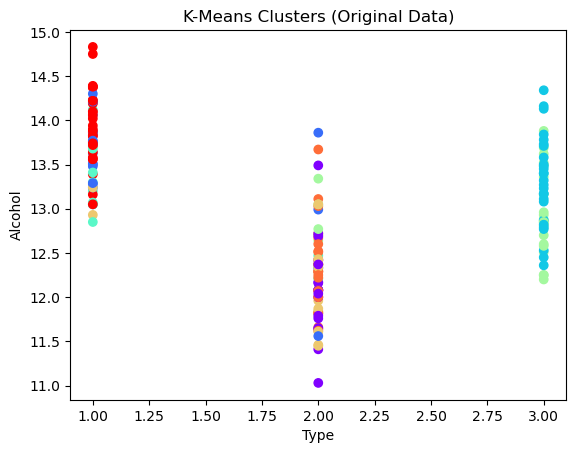

In [72]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=cluster_label, cmap='rainbow')
plt.title("K-Means Clusters (Original Data)")
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.show()

In [74]:
kmean_pca=KMeans(n_clusters=8,random_state=50)

In [78]:
clusters_pca = kmean_org.fit(pca_df)

In [80]:
cluster_label=kmean_org.labels_

In [84]:
silhouette_score_pca=silhouette_score(pca_df,cluster_label)

In [86]:
silhouette_score_pca

0.1751897385035684

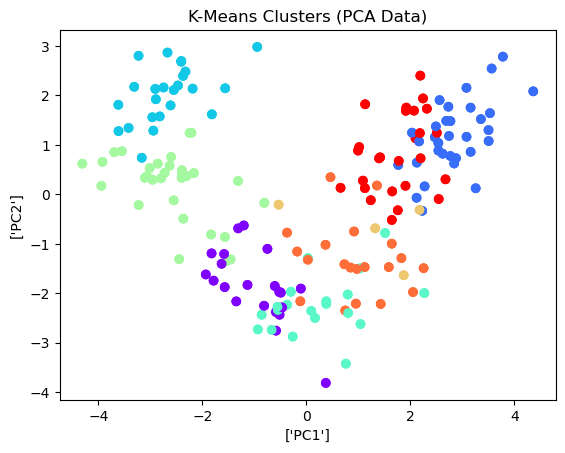

In [94]:
plt.scatter(pca_df['PC1'],pca_df['PC2'], c=cluster_label, cmap='rainbow')
plt.title("K-Means Clusters (PCA Data)")
plt.xlabel(['PC1'])
plt.ylabel(['PC2'])
plt.show()

1.	Compare the clustering results obtained from the original dataset and PCA-transformed data.

In [101]:
 ## Silhouette Score: Original Data : 0.14	PCA Data:0.17

2.	Discuss any similarities or differences observed in the clustering results.

In [104]:
## Similarities:
## Same general group structure:The clusters often represent the same natural groupings of samples
## Differences:
## Cluster shape and separation:In the original data, clusters may appear less clearly separated because of noise and correlated features.

3. In the original data, clusters may appear less clearly separated because of noise and correlated features.

In [107]:
## PCA reduces noise and redundant features:slightly better clustering.
## thats why original data be less clearly seprated clustering

4.	Analyze the trade-offs between using PCA and clustering directly on the original dataset.

In [110]:
## Visualization after PCA is easier
## Dimensionality reduction improves speed and reduces overfitting risk.

1.	Summarize the key findings and insights from the assignment.

In [113]:
## PCA effectively reduced dataset dimensionality
## K-Means performed comparably or slightly better on PCA data.
## Visualization became much clearer 

2.	Discuss the practical implications of using PCA and clustering in data analysis.

In [116]:
## Computation time is high.
## need to visualize data effectively.

3.	Provide recommendations for when to use each technique based on the analysis conducted.

In [121]:
## Use PCA as a preprocessing step to simplify high-dimensional data.
## Combine PCA with other methods (like K-Means) for better generalization.